# Métodos de integración

A partir de los apuntes de la prof. Pilar Hernandez Gamazo (U. de València)

In [1]:
import time
print(' Última ejecución  ', time.asctime() )

 Última ejecución   Thu Mar 16 10:42:41 2023


## Objectivos

Presentar y mostrar con ejemplos sencillos los diferentes métodos de integración

 * Integrales inmediatas,
 
 * Integración por partes,
 
 * Integración por sustitución,
 
 * Integración de fracciones de polinomios,
 
 * Integración de funciones trigonométicas.

Presentar las integrales impropias y mostrar algunos ejemplos.

In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import sympy as sp
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'

## Integrales inmediatas

Alguna integrales son inmediatas gracias al 1er teorema del cálculo integral que nos dice que si $f(x)$ es una función continua.

$$
F(x) = \int_a^x f(x) \, \mathrm{d}x \;\; \Rightarrow \;\; F'(x) = f(x)
$$

Integrales inmediatas triviales

$$
\int x^n \, \mathrm{d}x = \frac{1}{n+1} x^{n+1}, \, \mathrm{si} \, n \ne -1,\\
$$
$$
\int e^x \, \mathrm{d}x = e^x , \; \int \frac{1}{x} \, \mathrm{d}x = \log x, \, \mathrm{si} \, x \gt 0 \\
$$
$$
\int \cos x \, \mathrm{d}x = \sin x, \; \int \sin x \, \mathrm{d}x = - \cos x, \;
\int \frac{1}{\cos^2 x} \, \mathrm{d}x = \tan x
$$ 

¡En estos apuntes $\log$ es siempre Neperiano!

Otras integrales inmediatas no tan triviales:

$$
\int \frac{1}{1+x^2} \, \mathrm{d}x = \arctan x, \; \int \frac{1}{\sqrt{1-x^2}} \, \mathrm{d}x = \arcsin x, \, \mathrm{si} \, -1 \lt x \lt 1,
$$
$$
\int \frac{1}{\sqrt{1+x^2}} \, \mathrm{d}x = \mathrm{arcsinh} \, x, \,
\int \frac{1}{\sqrt{x^2-1}} \, \mathrm{d}x = \mathrm{arccosh} \, x, \, \mathrm{si} \, |x| \gt 1, \\
\int \frac{1}{1-x^2} \, \mathrm{d}x = \mathrm{arctanh} \,  x, \, \mathrm{si} -1 \lt x \lt 1.
$$

Recordemos:
    
$$
\sinh = \frac{e^x-e^{-x}}{2}, \; \cosh = \frac{e^x + e^{-x}}{2}, \; \tanh = \frac{e^{2x}-1}{e^{2x}+1}
$$

y

$$
\mathrm{arcsinh} \, x = \log \left(x + \sqrt{x^2+1} \right), \; 
\mathrm{arccosh} \, x = \log \left(x + \sqrt{x^2-1} \right), \; \mathrm{si} \; x \gt 1, \\
\mathrm{arctanh} \, x = \frac{1}{2}\log \frac{1+x}{1-x}, \, \mathrm{si} \; 0 \le x \lt 1\;.
$$


## Integración por partes

Sean $f(x), \, g(x)$ funciones continuas, entonces se cumple:

$$
\int f(x) \, g'(x) \, \mathrm{d}x = f(x) \, g(x) - \int f'(x) \, g(x) \, \mathrm{d}x
$$

De:

$$
f(x) \, g(x) = \int \left[f(x) \, g(x)\right]' \, \mathrm{d}x = \int f'(x) \, g(x) \, \mathrm{d}x + \int f(x) \, g'(x) \, \mathrm{d}x
$$

*Ejercicio:* Calcula
    
$$
\int x \, e^x \, \mathrm{d}x
$$

*Solución:*

tomamos: $f(x) = x, \; g'(x) = e^x$, así $f'(x) = 1, \; g(x) = e^x$, entonces:

$$
\int x \, e^x \, \mathrm{d}x = x \, e^x - \int e^x \mathrm{dx} = x \, e^x - e^x  = e^x \, (x - 1).
$$


## Integrales por sustitución

Sea $f(x), g'(x)$ continuas y $F(x)$ primitiva de $f(x)$, $F'(x) = f(x)$, se cumple:

$$
\int f(g(x)) \, g'(x) \, \mathrm{d}x = F(g(x))
$$

dado que por la regla de la cadena, se cumple:

$$
F(g(x))' = F'(g(x)) \, f'(x) = f(g(x)) \, g'(x)
$$

*Ejercicio*: Calcula
    
$$
\int \frac{1}{x \log x} \mathrm{d}x 
$$
    
*Solución*:

Si tomamos:

$$
f(x) = \frac{1}{x}, \; g'(x) = \frac{1}{x} \Rightarrow F(x) = \log(x), \, g(x) = \log(x)
$$

Por lo tanto:

$$
f(g(x)) \, g'(x) = \frac{1}{x\log x}
$$
$$
\int \frac{1}{x \log x} \mathrm{d}x = \log (\log x)
$$


De forma equivalente podemos hacer el siguiente cambio de variable:
    
$$
u = \log x \Rightarrow  \mathrm{d}u = \frac{1}{x} \, \mathrm{d}x
$$

Por lo tanto

$$
\int \frac{1}{x \log x} \, \mathrm{d}x = \int \frac{1}{u} \, \mathrm{d}u = \log u = \log(\log x)
$$

En la siguiente celda verificaremos con *SymPy* la integral.

*SymPy* es un módulo de *Python* que nos permite calcular derivadas, integrales, etc con cálculo simbólico.

In [3]:
x = sp.symbols("x")
sp.integrate("1/(x*log(x))", x)

log(log(x))

## Integración de funciones racionales

Estas integrales son:

$$
\int \frac{P_n(x)}{Q_m(x)} \, \mathrm{d}x
$$
donde el grado de los polinomios comple, $n < m$:

$$
P_n(x) = x^n + a_{n-1} x^{n-1} + \dots + a_{0} \\
Q_m(x) = x^m + b_{m-1} x^{m-1} + \dots + b_{0}
$$

El método de integrar puede ser largo pero está bien definido.

Se compone de los siguientes pasos:

 1. calcular las raices del polinomio del denominador,
 
 2. descomponer la razón en suma de razones más sencillas,
 
 3. integrar cada razón sencilla cuyas integrales están tabuladas.
 
*Cuestión:* En el caso de que la razón entre los polinomios sea $n \ge m$, ¿cómo harías la integral?

### Descomposición de polinomios


El polinomio del denominador se puede descomponer en el producto de polinomios:

$$
Q_m(x) = (x-\alpha_1)^{n_1} \dots (x-\alpha_p)^{n_p} \; (x^2+\beta_1x+\gamma_1)^{m_1} \dots (x^2+\beta_q+\gamma_q)^{m_q}
$$

donde las $\alpha_i$ son las $p$ raices reales, $i=1, \dots, p$, cada una de ellas con multiplicidad $n_i$.

y las $\beta_i, \gamma_i$ son los valores reales que corresponden a las $q$ raices imaginarias, $i=1, \dots, q$, que cumplen, $\beta^2_i - 4 \gamma_i \lt 0$, y que cada una aparece con multiplicidad $m_i$.

*Ejemplo:* Descomponer el polinomio: $Q_3(x) = x^3 + 2x^2 +2x +1$

Podemos comprobar que una raiz es $\alpha = -1, \; Q(-1) = -1 + 2 -2 + 1 = 0.$

Luego el polinomio queda:

$$
Q_3(x) = (x +1) \, (A x^2 + B x + C) = A x^3 + (A+B) x^2 + (B+C) x + C
$$

Por lo tanto:

$$
A = 1, \; A+B = 2, \; B+C = 2, \; C = 1
$$

que tiene como solución: $A=B=C=1$.

El polinomio $x^2 + x + 1$ no tiene raiz real sólo imaginaria, con $\beta = 1, \gamma = 1$, que cumplen $\beta^2 - 4 \gamma  = -3 < 0$.

La descomposición del polinomio es:

$$
Q_3(x) = (x+1) \, (x^2+x+1)
$$


### Suma de razones más sencillas

Dada la descomposición de $Q_m(x)$, la razón de polinomios puede expresarse como suma de fracciones más simples de polinomios:

$$
\frac{P_n(x)}{Q_m(x)} = \sum_{i=1}^p \frac{A^i_1}{(x-\alpha_i)} + \frac{A^i_2}{(x-\alpha_i)^2} + \dots + \frac{A^i_{n_i}}{(x-\alpha_i)^{n_i}}  \\
+ \sum_{j = 1}^{q} \frac{B^j_1 x + C^j_1}{(x^2 + \beta_j x + \gamma_j)} + \frac{B^j_2 x + C^j_2}{(x^2 + \beta_j x + \gamma_j)^2} + \dots + \frac{B^j_{m_j} x + C^j_{m_j}}{(x^2 + \beta_j x + \gamma_j)^{m_j}}
$$

*Ejemplo:* Expresa la siguiente razón como suma de fracciones simples:
    
$$
\frac{P_2(x)}{Q_3(x)} = \frac{3x^2+3x+1}{x^3+2x^2+2x+1}
$$

El denominador sabemos que puede descomponerse en:

$$
Q_3(x) = (x+1) \, (x^2+x+1)
$$

donde hay una raiz real $\alpha_1 = -1$ con multiplicidad $n_1=1$, y una compleja con $\beta_1 = 1, \gamma = 1$ con multiplicidad $m_1 = 1$

La razón de polinomios admite la siguiente suma:

$$
\frac{3x^2+3x+1}{x^3+2x^2+2x+1} = \frac{A}{x+1} + \frac{Bx + C}{x^2+x+1}
$$

Para determinar los coeficientes $A, B$ y $C$ igualamos los numeradores:

$$
3x^2+3x+1 = A \, (x^2+x+1) + (B x +C) \, (x+1) \\ = (A+B) x^2 + (A+B+C) x+ (A+C)
$$

Lo que implica el siguiente conjunto de igualdades:

$$
A+B = 3, \, A+B+C = 3, A+C = 1
$$

cuya solución es: $A = 1, B= 2, C = 0.$

Por lo tanto:

$$
\frac{3x^2+3x+1}{x^3+2x^2+2x+1} = \frac{1}{x+1} + \frac{2x}{x^2+x+1}
$$

### Integrales de las razones más sencillas

La integral de una razón de polinomios, despues de descomponerla en suma de razones más simples, implica la siguientes posibles integrales:

Para las raices reales con $n=1$

$$
\int \frac{A}{(x-\alpha)} \, \mathrm{d}x = A \, \log(x-\alpha)
$$

y para $n >1$:

$$
\int \frac{A}{(x-\alpha)^n} \, \mathrm{d}x = - \frac{1}{n-1} \frac{A}{(x-\alpha)^{n-1}}
$$

Para las raices complejas, para el caso $m = 1$

$$
\int \frac{B x + C}{(x^2 + \beta x + \gamma)} \, \mathrm{d} x= \frac{B}{2} \log (x^2+\beta+\gamma) 
+ \frac{C - \beta B /2}{\sqrt{a}} \arctan \frac{x + \beta/2}{\sqrt{a}}
$$

donde $a = \gamma - \beta^2/4$

y para el caso $m >1$:

$$
\int \frac{B x + C}{(x^2 + \beta x + \alpha)^m} \, \mathrm{d} x =
- \frac{B}{2(m - 1)} \frac{1}{(x^2+\beta x+ \alpha)^{m-1}} \\
+ \frac{C - \beta B /2}{a^m} \sqrt{a} \int \frac{1}{(u^2+1)^m} \, \mathrm{d}u
$$

con $u = \frac{x + \beta/2}{\sqrt{a}}$

Y la última integral cumple una regla recurrente:

$$
\int \frac{1}{(u^2+1)^m} \, \mathrm{d}x = \frac{2m-3}{2m-2} \int \frac{1}{(u^2+1)^{m-1}} \,  \mathrm{d}u + \frac{1}{2m-2} \frac{u}{(u^2+1)^{m-1}}
$$


*Ejemplo:* Calcula la integral:

$$
\int \frac{3x^2+3x+1}{x^3+2x^2+2x+1} \, \mathrm{d}x 
$$

*Solución* La integral será la suma de las integrales de las razones de polinomios que obtuvimos antes.

$$
\int \frac{1}{x+1} \, \mathrm{d}x + \int \frac{2x}{x^2+x+1} \, \mathrm{d}x
$$

Por las reglas que vimos anteriormente, estas integrales valen:

$$
\int \frac{1}{x+1} \, \mathrm{d}x  = \log (x+1) 
$$

y 

$$
\int \frac{2x}{x^2+x+1} \, \mathrm{d}x = \int \frac{2x+1}{x^2+x+1} \mathrm{d} x - \int \frac{1}{x^2+x+1} \, \mathrm{d}x\\
= \log(x^2+2x+1) - \frac{2}{\sqrt{3}} \arctan \frac{2x+1}{\sqrt{3}}
$$

Así:

$$
\int \frac{3x^2+3x+1}{x^3+2x^2+2x+1} \, \mathrm{d}x  = 
\log (x+1) + \log(x^2+2x+1) - \frac{2}{\sqrt{3}} \arctan \frac{2x+1}{\sqrt{3}}
$$


En las siguientes celdas verificaremos con *SymPy* las integrales

In [4]:
x       = sp.symbols('x')
sp.integrate("1/(x+1)", x)

log(x + 1)

In [5]:
sp.integrate("2*x/(x**2+x+1)", x)

log(x**2 + x + 1) - 2*sqrt(3)*atan(2*sqrt(3)*x/3 + sqrt(3)/3)/3

## Integrales trigonométricas

### Integrales con productos de $\sin x$ y $\cos x$

Las integrales de la forma:

$$
\int \sin^n x \cos^m x \, \mathrm{d}x
$$

Admiten los casos:

 * $n$ y $m$ son pares, $n= 2p, \, m = 2q$. En ese caso utilizamos recursivamente el cambio: 
 
$$
 \cos^2 x = \frac{1+\cos 2x}{2}, \;  \sin^2 x = \frac{1-\cos 2x}{2}
$$

 * Si $n$ es impar, $n = 2p+1$, hacemos el cambio $u = \cos x, \; \mathrm{d}u = - \sin x \, \mathrm{d}x$:
 
 $$
 \int \sin^n x \cos^m x \, \mathrm{d}x = \int \sin x \sin^{2p}x \cos^m x \, \mathrm{d}x 
 = \int - (1-u^2)^p u^m \, \mathrm{d}u
 $$
 
 * si $m$ es impar, $m = 2q+1$, hacemos el cambio $u = \sin x, \, \mathrm{d}u = \cos x \, \mathrm{dx}$:
 
 $$
 \int \sin^n x \cos^m x \, \mathrm{d}x = \int \cos x \cos^{2q}x \sin^n x \, \mathrm{d}x 
 = \int  (1-u^2)^q u^n \, \mathrm{d}u
 $$
 
 

### Integrales con productos de $\sin a x$ y $\cos b x$

Aplicaremos los relaciones trigonométricas:

$$
\cos ax \, \cos bx = \frac{\cos (a-b) \, x + \cos (a+b) \, x}{2} \\
\sin ax \, \sin bx = \frac{\cos (a-b) \, x - \cos (a+b) \, x}{2} \\
\sin ax \, \cos bx = \frac{\sin (a-b) \, x + \sin (a+b) \, x}{2}
$$

### Integrales racionales con $\cos x$ o $\sin x$

se pueden transformar en razones de polinomios con el cambio:

$$
u = \tan \frac{x}{2}, \; \mathrm{d}x = \frac{2}{1+u^2} \, \mathrm{d}u 
$$

así:

$$
\sin x = \frac{2u}{1+u^2}, \; \cos x = \frac{1-u^2}{1+u^2}
$$

*Ejemplo:* Calcula la integral

$$
\int \tan(x) \, \mathrm{d}x
$$

con el cambio $u = \cos x, \; \mathrm{d}u = - \sin x \, \mathrm{d}x$

$$
\int \frac{\sin x}{\cos x} \, \mathrm{d}x = \int -\frac{1}{u} \, \mathrm{d}u = - \log u = \log \frac{1}{u} = \log \frac{1}{\cos x}
$$

En la siguiente celda verificamos la integral con *SymPy*

In [6]:
sp.integrate("tan(x)", x)

-log(cos(x))

## Integrales impropias

Llamamos integrales impropias aquellas en las que:

 * uno o los dos límites de integración son $\pm \infty$,
 
 * la función a integrar no está acotada en alguno de los valores del intervalo de integración.

### Límites de integración en el infinito

En el caso de que uno de los límites sea $\pm \infty$, calculamos las integrales como un límite:

$$
\int_a^\infty f(x) \, \mathrm{d}x = \lim_{b \to \infty} \int_a^b f(x) \, \mathrm{d}x \\
\int_{-\infty}^b f(x) \, \mathrm{d}x = \lim_{a \to -\infty} \int_a^b f(x) \, \mathrm{d}x \\
$$

Si el límite existe decimos que la integral converse, si no que diverge.

*Ejemplo:* Calcula la integral impropia

$$
\int_1^\infty \frac{1}{x^2} \, \mathrm{d}x
$$

Calculamos:

$$
\lim_{b \to \infty} \int_1^b \frac{1}{x^2} \, \mathrm{d}x = \lim_{b \to \infty} \left. -\frac{1}{x} \right|_1^b = - \lim_{b\to \infty} \frac{1}{b} + 1 = 1
$$

La integral converge

En la siguiente celda mostramos la integral

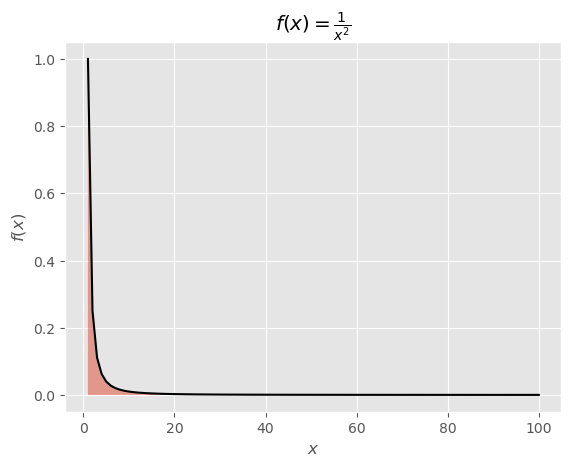

In [7]:
fun = lambda x : 1/x**2
a, b, size = 1, 1e2, 100
xs  = np.linspace(a, b, size)
plt.plot(xs, fun(xs), 'black'); # plt.plot(xs, np.zeros(100), 'black');
plt.fill_between(xs, fun(xs), alpha = 0.5); 
plt.xlabel(r"$x$"); plt.ylabel(r"$f(x)$"); plt.title(r"$f(x) = \frac{1}{x^2}$");

*Ejemplo:* Calcula la integral impropia:

$$
\int_1^\infty \frac{1}{x} \, \mathrm{d}x
$$

Calculamos:

$$
\lim_{b \to \infty} \int_1^b \frac{1}{x} \, \mathrm{d}x = \lim_{b \to \infty} \left. -\log x \right|_1^b =  \lim_{b\to \infty} \log b - 0 = \infty
$$

En este caso, la integral diverge

En la siguiente celda mostramos la integral

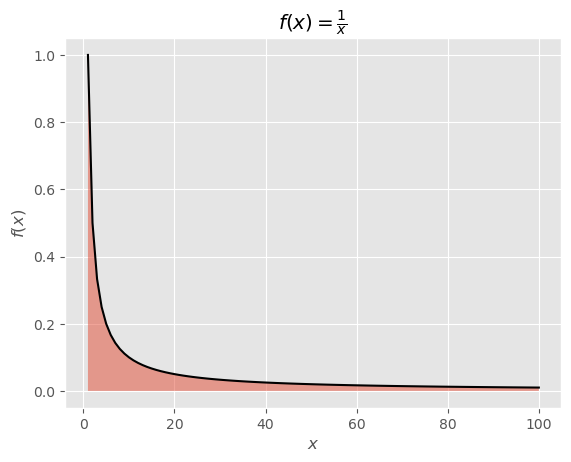

In [8]:
fun = lambda x : 1/x
a, b, size = 1, 1e2, 100
xs  = np.linspace(a, b, size)
plt.plot(xs, fun(xs), 'black'); # plt.plot(xs, np.zeros(100), 'black');
plt.fill_between(xs, fun(xs), alpha = 0.5); 
plt.xlabel(r"$x$"); plt.ylabel(r"$f(x)$"); plt.title(r"$f(x) = \frac{1}{x}$");

### funciones no acotadas

Si la función no está acotada en el extremo del intervalo, recurrimos de nuevo a calcular los límites.

Por ejemplo, si la función no está acotada en $b$, el extremo superior del intervalo, entonces:

$$
\int_a^b f(x)\, \mathrm{d}x \equiv \lim_{y \to b}\int_a^y f(x) \, \mathrm{d}x
$$

y de forma similar para el caso en el que la función no estuviese acotada en $a$.

Si la función no está acotada en un punto $c$ en el interior del intervalo $[a, b]$:

$$
\int_a^b f(x) \, \mathrm{d}x \equiv \lim_{y \to c^-} \int_a^y f(x) \, \mathrm{d}x + \lim_{y \to c^+} \int_y^b f(x) \, \mathrm{d}x
$$

*Ejemplo:* Calcular la integral impropia

$$
\int_0^1 \frac{1}{\sqrt{1-x}} \, \mathrm{d}x
$$

La función no está acotada en $b = 1$, por lo tanto calculamos:

$$
\lim_{y \to 1} \int_0^y \frac{1}{\sqrt{1-x}} \, \mathrm{d}x = \lim_{y \to 1} \left. - 2 \sqrt{1-x} \right|_0^y = \lim_{y \to 1} - 2 \sqrt{1-y} + 2 = 2
$$

La integral converge.

Lo verificamos en la siguiente celda:

In [9]:
sp.integrate("1/sqrt(1-x)", (x, 0, 1))

2

En la siguiente celda mostramos la integral:

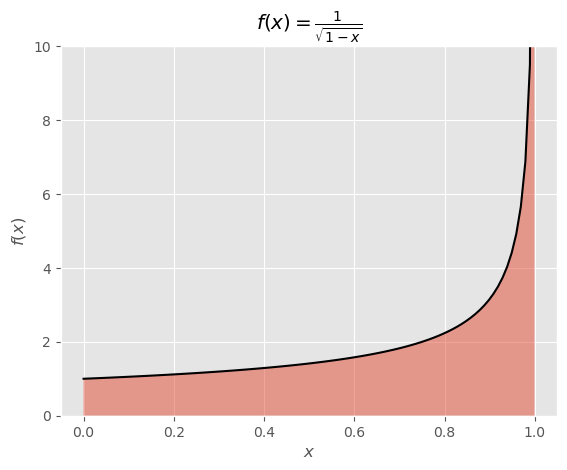

In [10]:
fun = lambda x : 1/np.sqrt(1-x) 
a, b, size = 0., 0.999, 100
xs  = np.linspace(a, b, size)
plt.plot(xs, fun(xs), 'black'); # plt.plot(xs, np.zeros(100), 'black');
plt.fill_between(xs, fun(xs), alpha = 0.5); 
plt.xlabel(r"$x$"); plt.ylabel(r"$f(x)$"); plt.title(r"$f(x) = \frac{1}{\sqrt{1-x}}$")
plt.ylim(0, 10);

*Ejemplo*: Calcular la integral impropia

$$
\int_0^2 \frac{1}{(1-x)^2} \, \mathrm{d}x
$$

La función no está acotada en el punto interior $x = 1$.

Calculamos la integral:

$$
\lim_{y \to 1^-} \int_0^y \frac{1}{(1-x)^2} \, \mathrm{d}x + \lim_{y \to 1^+} \int_y^2 \frac{1}{(1-x)^2} \, \mathrm{d}x \\
= \lim_{y \to 1^-} \left.  \frac{1}{(1-x)} \right|_0^y + \lim_{y \to 1^+} \left.  \frac{1}{(1-x)} \right|_y^2 \\
$$
$$
\lim_{y \to 1^-}   \frac{1}{(1-y)} - \lim_{y \to 1^+} \frac{1}{(1-y)} -2
$$

Ninguno de los dos límites existe y la integral diverge

Comprobémoslo con *SymPy*:

In [11]:
sp.integrate("1/(1-x)^2", (x, 0, 2))

oo

En la siguiente celda mostramos la integral

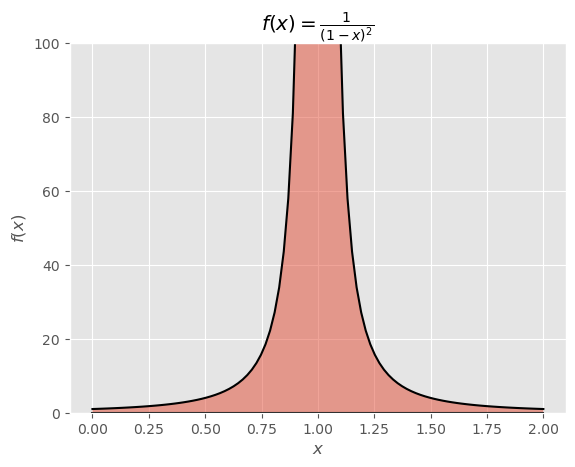

In [12]:
fun = lambda x : 1/(1-x)**2 
a, b, size = 0., 2, 100
xs  = np.linspace(a, b, size)
plt.plot(xs, fun(xs), 'black'); plt.plot(xs, np.zeros(100), 'black');
plt.fill_between(xs, fun(xs), alpha = 0.5); 
plt.xlabel(r"$x$"); plt.ylabel(r"$f(x)$"); plt.title(r"$f(x) = \frac{1}{(1-x)^2}$")
plt.ylim(0, 100);